In [1]:
#imports
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Edwin\Downloads\diabetes.csv')

In [3]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = data.iloc[:,0:8] #feature
y = data.iloc[:,8]   #target 

In [6]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3) #splitting

In [7]:
#standardizing 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
classifier=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')
model=classifier.fit(x_train,y_train)

In [9]:
yp=classifier.predict(x_test)
yp

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [11]:
CM=confusion_matrix(y_test,yp)
print(CM)

[[134  21]
 [ 35  41]]


<AxesSubplot:>

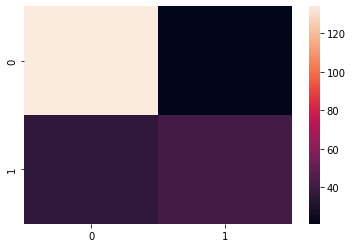

In [14]:
sns.heatmap(CM)

In [23]:
print("F-Score: ",(f1_score(y_test,yp)))

F-Score:  0.6086956521739131


In [24]:
print("Model Accuracy: ",accuracy_score(y_test,yp)*100,"%")

Model Accuracy:  76.62337662337663 %


In [15]:
# trying to find best model, with highest accuracy
best = 0
for _ in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.transform(x_test)
    
    classifier=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')
    
    model=classifier.fit(x_train,y_train)
    yp=classifier.predict(x_test)
    
    acc = accuracy_score(y_test,yp)*100
    print("Model Accuracy: ",acc ,"%")

    if acc > best:
        best = acc
        with open("KNNDiabetes.pickle", "wb") as f: # saving best model
            pickle.dump(classifier, f)

Model Accuracy:  75.32467532467533 %
Model Accuracy:  72.72727272727273 %
Model Accuracy:  72.07792207792207 %
Model Accuracy:  78.57142857142857 %
Model Accuracy:  74.67532467532467 %
Model Accuracy:  68.83116883116884 %
Model Accuracy:  73.37662337662337 %
Model Accuracy:  74.67532467532467 %
Model Accuracy:  68.18181818181817 %
Model Accuracy:  75.32467532467533 %
Model Accuracy:  78.57142857142857 %
Model Accuracy:  72.72727272727273 %
Model Accuracy:  75.97402597402598 %
Model Accuracy:  73.37662337662337 %
Model Accuracy:  75.97402597402598 %
Model Accuracy:  77.27272727272727 %
Model Accuracy:  75.97402597402598 %
Model Accuracy:  70.77922077922078 %
Model Accuracy:  74.67532467532467 %
Model Accuracy:  75.32467532467533 %
Model Accuracy:  68.18181818181817 %
Model Accuracy:  74.67532467532467 %
Model Accuracy:  74.67532467532467 %
Model Accuracy:  76.62337662337663 %
Model Accuracy:  75.97402597402598 %
Model Accuracy:  74.67532467532467 %
Model Accuracy:  72.72727272727273 %
M

In [16]:
best # accuracy of the model that saved


82.46753246753246

In [17]:
pickle_in = open("KNNDiabetes.pickle", "rb")
classifier = pickle.load(pickle_in)


predicted= classifier.predict(x_test)
predicted
# for x in range(len(predicted)):
#     print(predicted[x], x_test[x], list(y_test[x]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [18]:
CM=confusion_matrix(y_test,predicted) # 

In [19]:
CM

array([[89, 11],
       [26, 28]], dtype=int64)

In [20]:
accuracy_score(y_test, predicted)

0.7597402597402597

In [21]:
from sklearn.metrics import recall_score
recall_score(y_test, predicted, average='binary')

0.5185185185185185

In [23]:
arr = np.array([0.03694305,  0.7814604 ,  0.80400224,  0.38442643,  0.17222545,
        -0.42651342, -0.86224809, -0.54508102], ndmin = 2) # a test arr should be 0 

In [24]:
predicted1 = classifier.predict(arr)

In [25]:
predicted1[0]

0

### Conclusion

Successfully saved a pickle model of KNN for diabetes, and reloaded it, and got correct values when testing.